In [17]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
# Twitter App access keys for @user

# Consume:
CONSUMER_KEY    = 'vjw86vvE6Rm3cQihPucTRkN1l'
CONSUMER_SECRET = '6NDHa2zLD6g4R0vqEfF65B5jdHxB83zhYV7qDVm2rH9WlKyusZ'

# Access:
ACCESS_TOKEN  = '996110379896864769-05PXtePousw0UQ6AC3QNP1ZVn2YSORD'
ACCESS_SECRET = 'EEQxnqOyiFh1PFBjXUiB1jFwYXy74k7hMg0khw1LW3qOU'

In [19]:
# We import our access keys:
   # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [20]:
# We create an extractor object:
extractor = twitter_setup()
tweets=[]
# We create a tweet list as follows:

for tweet in tweepy.Cursor(extractor.search,q="@ideacellular",count=100,
                           lang="en",
                           since="2017-04-03").items():
    tweets.append(tweet.text)

print("Number of tweets extracted: {}.\n".format(len(tweet.text)))



Number of tweets extracted: 147.



In [21]:
str1 = ''.join(tweets)


In [22]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,@ideacellular this is your network speeds moro...
1,RT @sonymusicindia: Let your callers groove to...
2,@sonymusicindia @AkasaSing @airtelindia @Vodaf...
3,RT @vehla75: .@ideacellular is worst network ...
4,@ManoharaS10 @Airtel_Presence @airtelindia @Ai...
5,@NileshVasava80 @JioCare This telecom war has ...
6,@Airtel_Presence @airtelindia is there any upd...
7,Successfully swapped my sim from #airtel to #i...
8,@idea_cares Hahaha ... See your network range ...
9,@Airtel_Presence @airtelindia @Airtel worst in...


In [23]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [24]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(30))

,Tweets,SA
0,@ideacellular this is your network speeds moro...,-1
1,RT @sonymusicindia: Let your callers groove to...,0
2,@sonymusicindia @AkasaSing @airtelindia @Vodaf...,1
3,RT @vehla75: .@ideacellular is worst network ...,-1
4,@ManoharaS10 @Airtel_Presence @airtelindia @Ai...,1
5,@NileshVasava80 @JioCare This telecom war has ...,-1
6,@Airtel_Presence @airtelindia is there any upd...,0
7,Successfully swapped my sim from #airtel to #i...,1
8,@idea_cares Hahaha ... See your network range ...,1
9,@Airtel_Presence @airtelindia @Airtel worst in...,-1


In [25]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [26]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 25.0%
Percentage of neutral tweets: 45.94444444444444%
Percentage de negative tweets: 29.055555555555557%


In [27]:
###Preprocess tweets
def processTweet2(str1):
    # process the tweets

    #Convert to lower case
    str1 = str1.lower()
    #Convert www.* or https?://* to URL
    str1 = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',str1)
  
    #Convert @username to AT_USER
    str1 = re.sub('@[^\s]+...','',str1)
  
    #Remove additional white spaces
    str1 = re.sub('[\s]+', ' ', str1)
    #Replace #word with word
    str1 = re.sub(r'#([^\s]+)', r'\1', str1)
    #trim
    str1 = str1.strip('\'"')
    return str1    


#end

In [28]:
str2= processTweet2(str1)


In [29]:
blob= TextBlob(str2)
str3=[]
count=0
for np in blob.noun_phrases:
  
  str3.append(np)
  count+=1
str4=''.join(str3)

print (count)

network speeds morons download speed
1mbps t
callers groove
caller tune
odafonein perb song .. 👌👌👌 thugranjha 😊rt ideacellular
network provider
😡👎irtel_presence irtel manu
telecom war
drop prblm
calls 4m ur side askng t…
idea messages
messa… hahaha ...
network range ... i
times airtelindia rst internet service
ticket s
months n
i'm… deacellular
immediate redressal
immediate punitive action
be… deacellular
fur… t
callers groove
caller tune
…rt t
callers groove
caller tune
…y idea
callers groove
caller tune now.…
new project
wazirabad gurgaon…
mobile network
free sms
life time
daily basis
low network
positive response
custom… friend mp
only… deacellular snlcorporate moindia
dilavalpur sewapuri
… eliancejio odafonein i
time period
u resole
😡or signal strength
poor speed
idea 4g
network provider
long hours
deduct money
any… y
recharge work
time i
15₹ 1hr
4g p…
announcement atleast
… ttention jio subcribers
calls service
recha… ich
service provider
telecom sector odafonein eliancejiort ich


i m finally… deacellular eliancejio hi niranjan
o… snl_mh iocare prakash
part of… dunmirchi mulyasea dea_cares rai odafonein gugle deacellular iocare
so.rt iranjantripa16 odafonein eliancejio
service providers
…rt mulyasea dea_cares rai odafonein gugle ahulgandh…rt atdots deaonline rkrantivijay hwetagursahani ssidhoo dunmirch…rt dea_cares rai odafonein gugle ahulgandhi muralid…deacellular sir need
unnecessary charges
mb data ch…
indoor uninterrupted… mulyasea dea_cares rai odafonein ideacellular iocare
service provi…
nowit's… i
drop issue
morons disconnect
4g device
may.… deacellular hi munnangi
y… mulyasea dea_cares rai odafonein gugle ahulgandh…rt atdots deaonline rkrantivijay hwetagursahani ssidhoo dunmirch…rt dea_cares rai odafonein gugle ahulgandhi muralid…rt mulyasea dea_cares rai odafonein gugle ahulgandh…rt deacellular wrost service
helprt mulyasea dea_cares rai odafonein gugle ahulgandh…rt mulyasea dea_cares rai odafonein gugle ahulgandh…ost service
helpatdots deaonline rkrant

In [30]:
# modules for generating the word cloud
from os import path, getcwd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

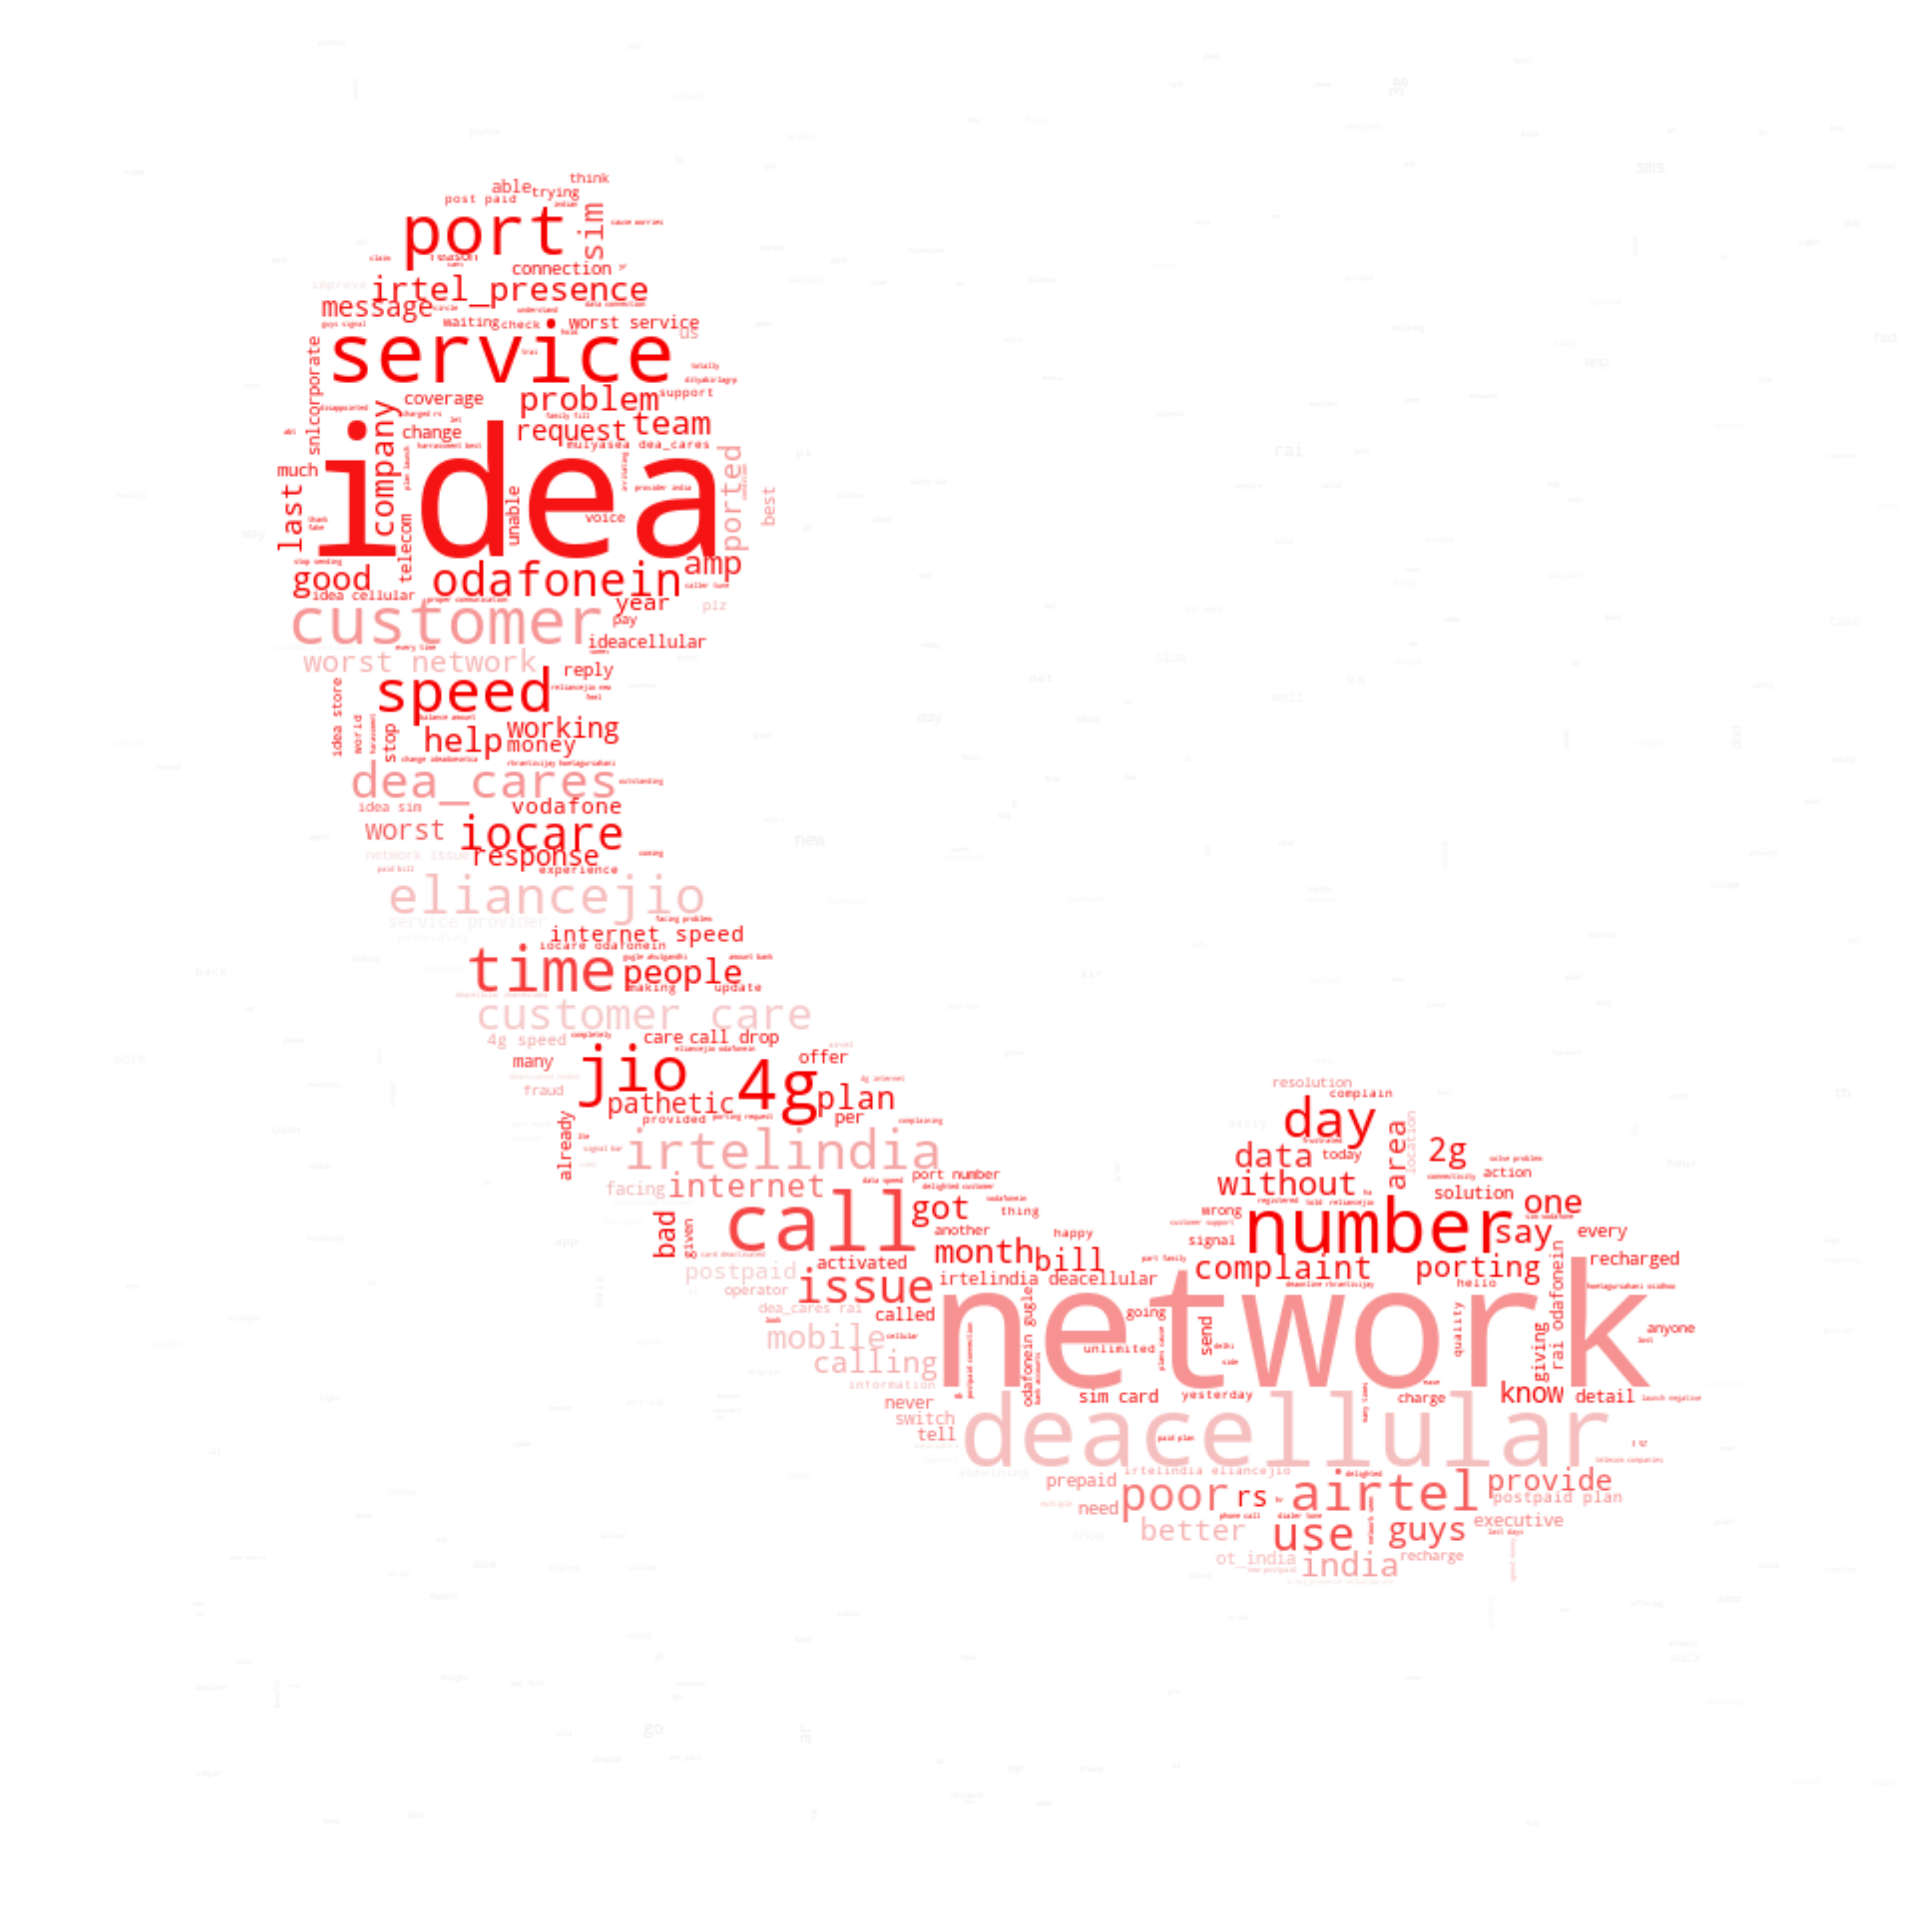

In [31]:
d = getcwd()
## join all documents in corpus
text= ''.join(str2)
stp=list(set(STOPWORDS))
w=['hi','ur','dear','rt','even','really','still','...','now','please','getting','guy','want','day','will','using','make','give']
q=w+stp

## image from PublicDomainPictures.net
## http://www.publicdomainpictures.net/view-image.php?image=232185&picture=family-gathering
mask = np.array(Image.open(path.join(d, "test6.jpg")))
wc = WordCloud(background_color="white", max_words=500, mask=mask,stopwords=q,
               max_font_size=90, random_state=42)
wc.generate(text)
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,10],dpi=400)
plt.tight_layout(pad=0)
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

_=plt.show()